In [1]:
import cv2
from PIL import Image
import pytesseract


In [2]:
# open and convert the image to greyscale
image = cv2.imread('car.jpeg') # replace with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



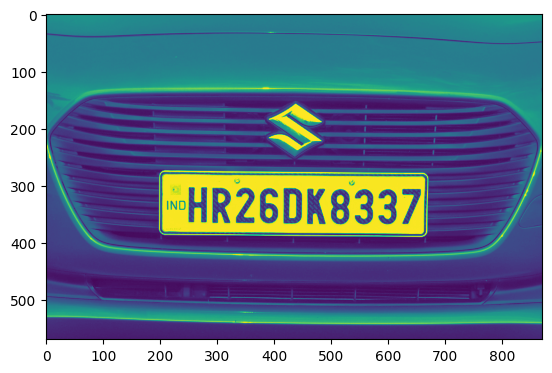

In [4]:
from matplotlib import pyplot as plt

# Use plt.imshow to display the image
plt.imshow(gray_image)
plt.show()

In [5]:
# noice removal and enhancement

binary_image = cv2.threshold(gray_image, 180, 255,
                             cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
enhanced_image = cv2.bilateralFilter(binary_image, 11, 17, 17)


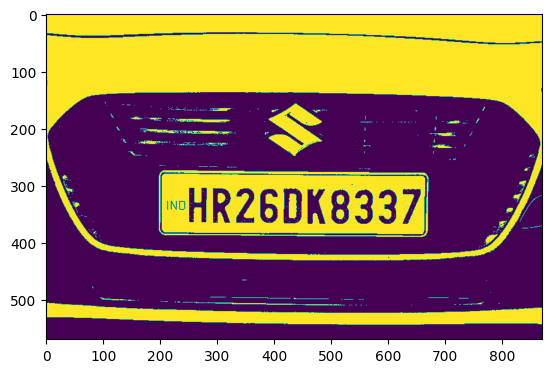

In [8]:
plt.imshow(enhanced_image)
plt.show()

In [9]:
# edge detection
edge_image = cv2.Canny(enhanced_image, 170, 200)


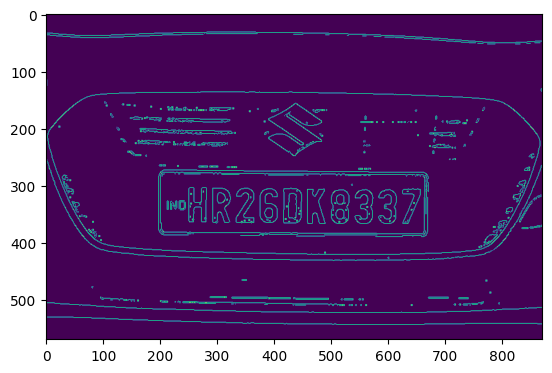

In [11]:
plt.imshow(edge_image)
plt.show()

In [12]:
# find countours in an image
contours, _= cv2.findContours(edge_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [15]:
contours= sorted(contours, key = cv2.contourArea, reverse = True)[:30]
license_plate = None
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.018 * perimeter, True)
    if len(approx) == 4: # Select the contour with 4 corners
        license_plate = approx
        break

print(license_plate)

None


In [17]:
import numpy as np

In [21]:
mask = np.zeros(gray_image.shape,np.uint8)
if license_plate is not None:
    new_image = cv2.drawContours(mask,[license_plate],0,255,-1,)
    new_image = cv2.bitwise_and(image,image,mask=mask)
    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    Cropped = gray_image[topx:bottomx+1, topy:bottomy+1]

    text = pytesseract.image_to_string(Cropped, config='--psm 11')

else:
    print("License plate could not be detected")
    new_image = image  # Or handle the error as per your need


License plate could not be detected
